In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

iowa_file_path = 'D:/chenghan/G10/CSwith berkeley files/archive/archive/DATA1.csv'
home_data = pd.read_csv(iowa_file_path)
print(home_data)
home_data.info()
home_data.isnull().sum() ## additional call if needed: .dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Car     36 non-null     object
 1   Model   36 non-null     object
 2   Volume  36 non-null     int64 
 3   Weight  36 non-null     int64 
 4   CO2     36 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.5+ KB


Car       0
Model     0
Volume    0
Weight    0
CO2       0
dtype: int64

Car       
Mercedes      5
Ford          5
Skoda         4
BMW           3
Opel          3
Audi          3
Volvo         3
Hyundai       1
Mazda         1
Hundai        1
Mini          1
Mitsubishi    1
Honda         1
Fiat          1
Suzuki        1
Toyota        1
VW            1
dtype: int64
Model     
Fiesta        2
Rapid         1
Focus         1
I20           1
I30           1
Insignia      1
Mondeo        1
Octavia       1
1             1
Fabia         1
SLK           1
Space Star    1
Swift         1
Up!           1
V70           1
XC70          1
S60           1
E-Class       1
2             1
A6            1
3             1
5             1
500           1
A-Class       1
A1            1
A4            1
Astra         1
Cooper        1
Aygo          1
B-Max         1
C-Class       1
CLA           1
Citigo        1
Civic         1
Zafira        1
dtype: int64
Volume
1600      12
2000       7
1000       4
1500       4
2100       2
900        1
1100       1
1200       1
1300     

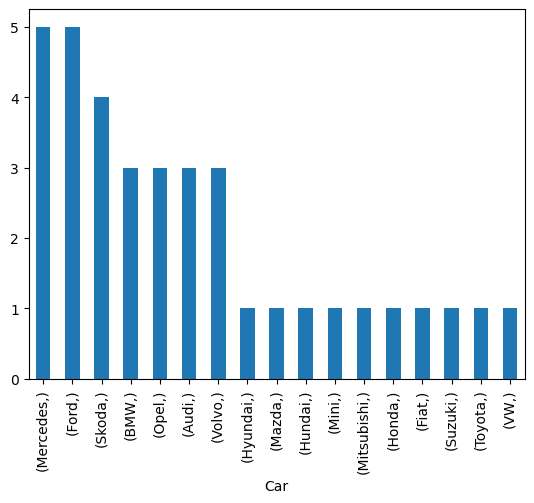

In [73]:
##Statistics Displayment##
def display_data(dictionary):
    for key in dictionary:
        print(dictionary[[key]].value_counts())
display_data(home_data)

home_data[['Car', 'Model']].value_counts().plot.bar(y='count');
home_data[['Car']].value_counts().plot.bar(y='count');

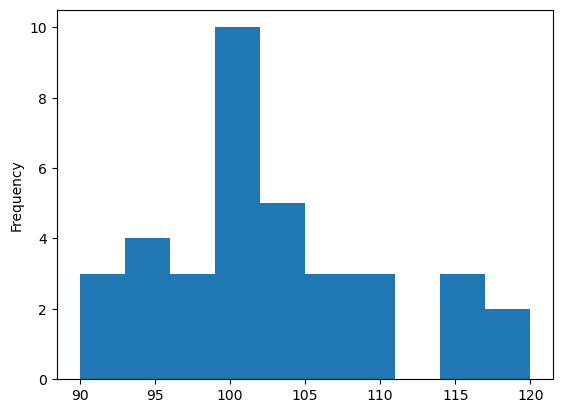

In [83]:
home_data['CO2'].plot.hist(column="Model",bins=10);

C:\Users\Cheng Han\AppData\Local\Temp\ipykernel_18844\3464474443.py:10: FutureWarning: Could not cast to int16, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised.
  pd.DataFrame(meta_data, index=['maximum', 'minimum', 'lower quartile', 'median', 'upper quartile', 'IQR', 'mean'], dtype="int16") ##dtype meants to save space


,Weight,Volume,CO2
maximum,1746,2500,120
minimum,790,900,90
lower quartile,1117.25,1475.0,97.75
median,1329.0,1600.0,99.0
upper quartile,1418.25,2000.0,105.0
IQR,301.0,525.0,7.25
mean,1292.277778,1611.111111,102.027778


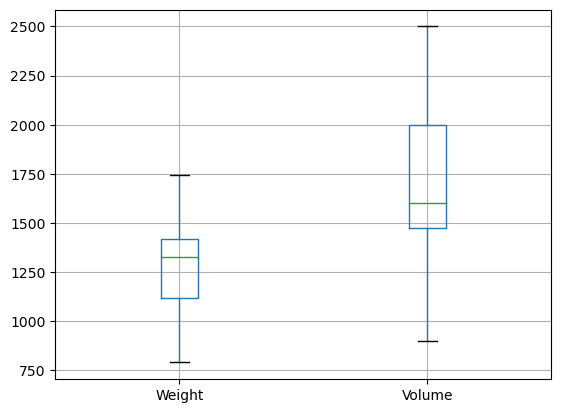

In [129]:
home_data.boxplot(column=["Weight","Volume"]);
meta_data = {}
def statistics(key): ##Gives the accurate value of the statistics
    l = [np.max(home_data[key]), np.min(home_data[key]), np.percentile(home_data[key], (25)), np.median(home_data[key]), np.percentile(home_data[key], (75)),
         np.percentile(home_data[key], (75))-np.percentile(home_data[key], (25)), np.mean(home_data[key])]
    meta_data[key] = l
statistics('Weight')
statistics('Volume')
statistics('CO2') ##Why choose UDF: it is easier than traverse through all the keys, since some of the values are not numbers.
pd.DataFrame(meta_data, index=['maximum', 'minimum', 'lower quartile', 'median', 'upper quartile', 'IQR', 'mean'], dtype="int16") ##dtype meants to save space

<AxesSubplot:xlabel='Volume', ylabel='Weight'>

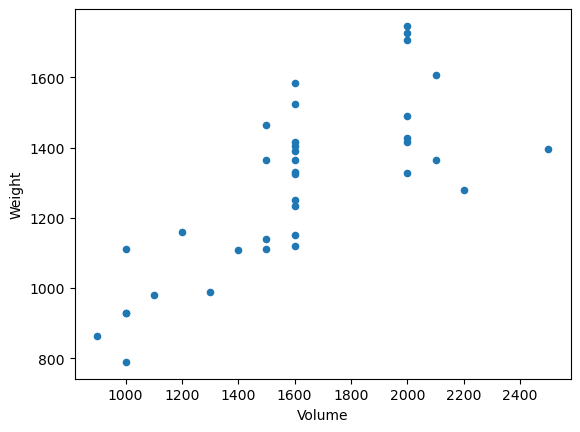

In [93]:
home_data.plot.scatter(x="Volume",y="Weight")

<AxesSubplot:xlabel='Volume', ylabel='Car'>

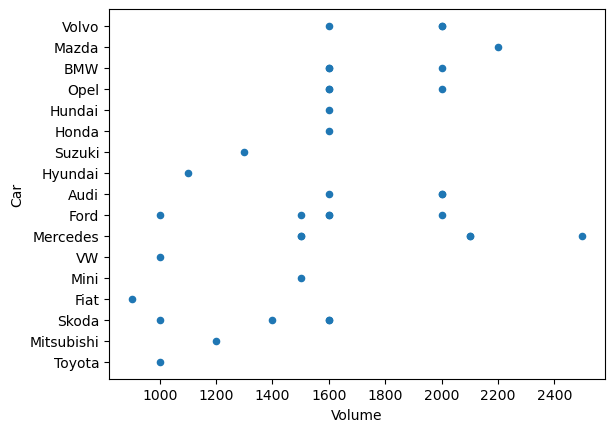

In [98]:
home_data.plot.scatter(x="Volume",y="Car")

<AxesSubplot:xlabel='Weight', ylabel='CO2'>

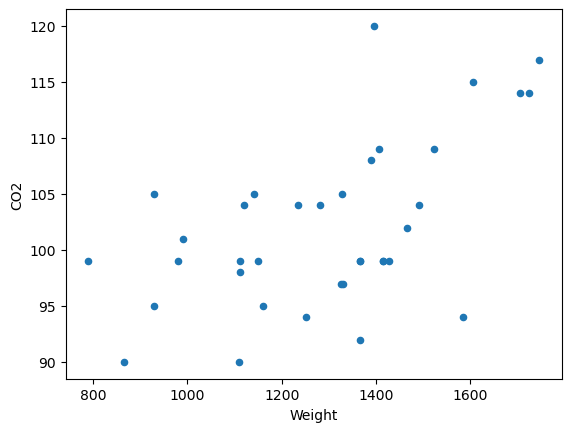

In [145]:
home_data.plot.scatter(x="Weight",y="CO2")

          Volume    Weight       CO2
Volume  1.000000  0.753537  0.592082
Weight  0.753537  1.000000  0.552150
CO2     0.592082  0.552150  1.000000


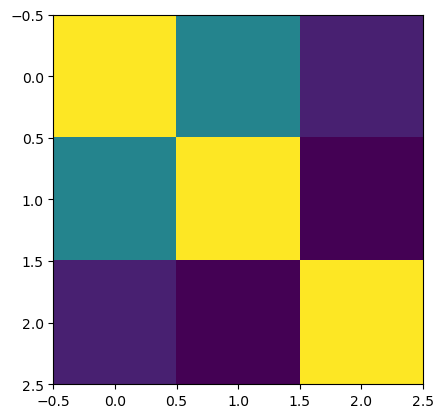

In [150]:
cor = home_data[['Volume', 'Weight', 'CO2']].corr()
plt.imshow(cor)
print(cor)

In [156]:
##Linear Regression model
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

x=home_data[['Volume','Weight']] ##Can be changed to find the best model
y=home_data['CO2']
function=linear_model.LinearRegression()
model1=function.fit(x,y)
coef,intercept=model1.coef_,model1.intercept_
print(str(coef[0]),'Volume +',str(coef[1]),'Weight +'+str(intercept))
predCo2=function.predict([[1300,2300]])
print('CO2: ',predCo2)

0.007805257527747126 Volume + 0.007550947270300686 Weight +79.69471929115939
CO2:  [107.2087328]


D:\chenghan\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [141]:
##Another Model
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

y = home_data.CO2
# Create X
features = ['Volume', 'Weight']##Can be changed to find the best model
X = home_data[features]

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
# Using best value for max_leaf_nodes
iowa_model = DecisionTreeRegressor(max_leaf_nodes=20, random_state=1) ##leaf nodes can be changed to prevent overfitting or underfitting 
iowa_model.fit(train_X, train_y)
val_predictions = iowa_model.predict(val_X)
val_mae = mean_absolute_error(val_predictions, val_y)

##Again another model
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(train_X, train_y)
val_prediction = rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(val_predictions, val_y)
print(val_mae, rf_val_mae)

5.377777777777778 5.377777777777778
